In [13]:
import math
import numpy as np
import matplotlib.pylab as pl

count = 0

def incCount():
    global count
    count = count+1

#done
def calcQuasiX(x0, A, grad, lmb):
    '''
        x0 - gradient*lambda
    '''
    lmbA = np.dot(lmb, A)
    lmbAgrad = np.dot(lmbA, grad)
    calc = x0 - lmbAgrad
    return calc

#done
def svennQuasi(x0, grad, lmb, delta, A):
    """
        One-dimensional Svenn search
    """
    #print "Svenn stage..."
    f0 = fun(calcQuasiX(x0, A, grad, lmb))
    if f0 < fun(calcQuasiX(x0, A, grad, lmb+delta)):
        delta = -delta
    x1 = lmb + delta
    f1 = fun(calcQuasiX(x0, A, grad, x1))
    while f1 < f0:
        delta *= 2
        lmb = x1
        x1 = lmb + delta
        f0 = f1
        f1 = fun(calcQuasiX(x0, A, grad, x1))
    a = lmb + delta/2
    b = lmb - delta/2    
    f0 = fun(calcQuasiX(x0, A, grad, lmb))
    f1 = fun(calcQuasiX(x0, A, grad, b))    
    
    if f0 < f1:
        if a < b:
            return [a, b]
        else:
            return [b, a]
    elif f1 < f0:
        if lmb < x1:
            return [lmb, x1]
        else:
            return [x1, lmb]
    else:
        if lmb < b:
            return [lmb, b]
        else:
            return [b, lmb]


def dscQuasi(x0, grad, lmb, delta, A):
    svenn_res = svennQuasi(x0, grad, lmb, delta, A)
    x1 = svenn_res[0]
    x3 = svenn_res[1]
    x2 = (x1 + x3)/2
    f1 = fun(calcQuasiX(x0, A, grad, x1))
    f2 = fun(calcQuasiX(x0, A, grad, x2))
    f3 = fun(calcQuasiX(x0, A, grad, x3))
    xApprox = x2 + ((x3 - x2) * (f1 - f3)) / (2 * (f1 - 2 * f2 + f3))
    return [x1, x2, x3, xApprox]


def dscPowellQuasi(x0, grad, eps, lmb, delta, A):
    dsc_res = dscQuasi(x0, grad, lmb, delta, A)
    a = dsc_res[0]
    xmin = dsc_res[1]
    b = dsc_res[2]
    xApprox = dsc_res[3]

    while abs(xmin-xApprox) >= eps or abs(fun(calcQuasiX(x0, A, grad, xmin)) - fun(calcQuasiX(x0, A, grad, xApprox))) >= eps:
        if xApprox < xmin:
            b = xmin
        else:
            a = xmin
        xmin = xApprox
        funcRes =  [fun(calcQuasiX(x0, A, grad, a)), fun(calcQuasiX(x0, A, grad, xmin)), fun(calcQuasiX(x0, A, grad, b))]
        a1 = (funcRes[1] - funcRes[0]) / (xmin - a)
        a2 = ((funcRes[2] - funcRes[0]) / (b - a) - a1) / (b - xmin)
        xApprox = (a + xmin) / 2 - a1 / (2 * a2)
    return xmin      

#done
def goldQuasi(a, b, eps, x0, grad, A):
    """
        One-dimensional gold search
    """
    l = sub(b,a)
    x1 = add(a, mults(l, 0.382))
    x2 = add(a, mults(l, 0.618))
    while l > eps:
        if fun(calcQuasiX(x0, A, grad, x1)) < fun(calcQuasiX(x0, A, grad, x2)):
            b = x2
            x2 = x1
            l = sub(b,a)
            x1 = add(a, mults(l, 0.382))
            print("gold a: " + str(a))
            print("gold b: " + str(b)) 
        else:
            a = x1
            x1 = x2
            l = sub(b,a)
            x2 = add(a, mults(l, 0.618))
            print ("gold a: " + str(a))
            print ("gold b: " + str(b)) 
   
    return [a, b]            
 
#done           
def calcLambdaQuasi(x0, grad, eps, lmb, A):
    line = svennQuasi(x0, grad, lmb, 0.1, A)
    line = goldQuasi(line[0], line[1], eps, x0, grad, A)
    lmb = (line[0] + line[1])/2
    return lmb    
    

def plot(points, col):
    n = 256
    x = np.linspace(-20, 20, n)
    y = np.linspace(-20, 20, n)
    X, Y = np.meshgrid(x, y)
    
    xs = []
    ys = []
    
    pl.contourf(X, Y, fun([X, Y]), 8, alpha=.75, cmap='jet')
    pl.contour(X, Y, fun([X, Y]), 8, colors='black') 
    
    for i in range(len(points)):
        xs.append(points[i][0])
        ys.append(points[i][1])
    
    pl.plot(xs, ys, marker='o', linestyle='--', color=str(col), label='Square')

def add(x, y):
    res = []
    for i in range(len(x)):
        res.append(x[i] + y[i])
    return res

def sub(x, y):
    res = []
    for i in range(len(x)):
        res.append(x[i] - y[i])
    return res        

def mults(x, n):
    res = []
    for i in range(len(x)):
        res.append(x[i]*n)
    return res
    
def derivative(x, n):
    h = []
    for i in range(len(x)):
        if i == n:
            h.append(1e-5)
        else:
            h.append(0)
    return (fun([x[0] + h[0], x[1] + h[1]]) - fun([x[0] - h[0], x[1] - h[1]]))/(2*h[n])
    #return (fun([x[0] + h[0], x[1] + h[1]]) - fun(x)/(h[n]))     
    #return (fun(x) - fun([x[0] - h[0], x[1] - h[1]]))/(h[n])  # разностная схема назад - ок   
    
    

def derivative2(x, a, b):
    ai = []
    aj = []
    for i in range(len(x)):
        if i == a:
            ai.append(0.001)
        else:
            ai.append(0)
    for j in range(len(x)):
        if j == b:
            aj.append(0.001)
        else:
            aj.append(0)
    return (fun(add(x, add(ai, aj))) - fun(add(x, ai)) - fun(add(x, aj)) + fun(x))/ (ai[a]**2)     

def gradient(x):
    grad = []
    for i in range(len(x)):
        grad.append(derivative(x, i))
    return grad 
    
def norm(s1):
    normas = 0
    for i in range(len(s1)):
        normas += s1[i]**2
    return math.sqrt(normas)    

def hesse(x):
    h = []
    for i in range(len(x)):
        for j in range(len(x)):
            h.append(derivative2(x, i, j))
    return h        
    
def fun(x):
    incCount()
    return (x[0]+3*x[1])**2 + (x[1]+5)**2


def dfp(x0, eps1, eps2):
    restart = 0
    iteration = 0
    xs = []
    xs.append(x0)
    lmb = 0.01
    A = np.eye(len(x0))
    
    print (x0)
    print ("------------------------")
    while True:   
                
            grad = gradient(x0)
            
            if iteration > 0:
                if norm(grad) < eps1:
                    print ("=========================")
                    print ("break")   
                    print ("FUNCTIONS COUNT")
                    print (count) 
                    print ("ITERATIONS")
                    print (iteration)
                    print ("RESTARTS")
                    print (restart)
                    plot(xs, 'red') 
                    break  
                
            lmb = dscPowellQuasi(x0, grad, eps2, lmb, 0.01, A)
            
            if lmb < 0:
                print ("RESTART")
                A = np.eye(len(x0))    
                restart = restart+1   
                
            x1 = calcQuasiX(x0, A, grad, lmb)
                                    
            deltag = np.array(sub(gradient(x1), gradient(x0)))[np.newaxis]
            deltax = sub(x1, x0)
                         
          
            deltax =  np.array(deltax)[np.newaxis]
            deltaxT = np.array(deltax).T
            deltagT = np.array(deltag).T
            
            # А теперь делаем так, чтобы работало на питоне :)
            
            deltax, deltaxT = deltaxT, deltax
            deltag, deltagT = deltagT, deltag
            
            first = np.dot(deltax, deltaxT)
            second = np.dot(deltaxT,deltag)
            resOne = first/second
            #print resOne
            
            first = np.dot(A, deltag)
            second = np.dot(first, deltagT)
            third = np.dot(second, A)
            temp = third
            
            first = np.dot(deltagT, A)
            second = np.dot(first, deltag)
            
            resTwo = temp/second
            #print resTwo
            
            A = A + resOne - resTwo
            #print "MATRIX A"
            #print A 
            
            x0 = x1
            xs.append(x0)
            print ("POINT")
            print (x1)
            print ("FUNCTIONS COUNT")
            print (count)
            print ("LAMBDA")
            print (lmb)
            print ("INV A")
            print (np.linalg.inv(A))
            #print "HESSE"
            #print hesse(x1)
            print ("------------------------")
            iteration +=1
            
    print ("==============================")
    print (x1)      

[10, 10]
------------------------
POINT
[ 6.33294798 -2.37630058]
FUNCTIONS COUNT
29
LAMBDA
0.045838150294800886
INV A
[[ 2.75077087  5.77754938]
 [ 5.77754938 20.06591129]]
------------------------
POINT
[14.52594237 -4.85649276]
FUNCTIONS COUNT
60
LAMBDA
5.155838150294802
INV A
[[ 2.  6.]
 [ 6. 20.]]
------------------------
break
FUNCTIONS COUNT
64
ITERATIONS
2
RESTARTS
0
[14.52594237 -4.85649276]


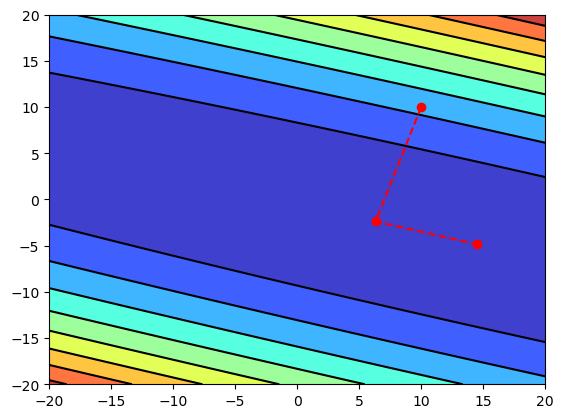

In [14]:
dfp([10, 10], 0.35, 0.35)